## Objetivo

Usar árvores de decisão e regressão logistica para prever resultados de uma partida de LoL. Determinar quais variáveis tem mais valor em cada modelo.

### Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('whitegrid')
%matplotlib inline

import plotly.express as px

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics


from matplotlib import pyplot

### Importando os dados

In [2]:
leaguedata = pd.read_csv('euw_challanger.csv', index_col=0)

In [3]:
leaguedata.head()

,Unnamed: 0.1,kills,deaths,assists,killParticipation,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit,win
0,0,11.0,5.0,7.0,3.600000,3.600000,509.580253,243.0,14950.0,225213.0,51.0,1.558169,31.0,25.0,True
1,1,21.0,11.0,13.0,3.090909,3.090909,461.392738,264.0,20375.0,341115.0,76.0,1.427324,268.0,54.0,True
2,2,9.0,7.0,8.0,2.428571,2.428571,394.271504,140.0,9325.0,95379.0,38.0,1.438050,14.0,18.0,True
3,3,11.0,2.0,2.0,6.500000,6.500000,513.628158,187.0,12275.0,147991.0,28.0,1.156925,8.0,1.0,False
4,4,9.0,3.0,4.0,4.333333,4.333333,559.206714,337.0,17950.0,355498.0,74.0,2.098381,7.0,8.0,True


In [4]:
#Remover a coluna Unnamed
leaguedata.pop("Unnamed: 0.1")
leaguedata.head()

,kills,deaths,assists,killParticipation,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit,win
0,11.0,5.0,7.0,3.600000,3.600000,509.580253,243.0,14950.0,225213.0,51.0,1.558169,31.0,25.0,True
1,21.0,11.0,13.0,3.090909,3.090909,461.392738,264.0,20375.0,341115.0,76.0,1.427324,268.0,54.0,True
2,9.0,7.0,8.0,2.428571,2.428571,394.271504,140.0,9325.0,95379.0,38.0,1.438050,14.0,18.0,True
3,11.0,2.0,2.0,6.500000,6.500000,513.628158,187.0,12275.0,147991.0,28.0,1.156925,8.0,1.0,False
4,9.0,3.0,4.0,4.333333,4.333333,559.206714,337.0,17950.0,355498.0,74.0,2.098381,7.0,8.0,True


In [5]:
leaguedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5624 entries, 0 to 5701
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   kills                 5624 non-null   float64
 1   deaths                5624 non-null   float64
 2   assists               5624 non-null   float64
 3   killParticipation     5624 non-null   float64
 4   kda                   5624 non-null   float64
 5   goldPerMinute         5624 non-null   float64
 6   totalMinionsKilled    5624 non-null   float64
 7   gold                  5624 non-null   float64
 8   totalDamageDealt      5624 non-null   float64
 9   visionScore           5624 non-null   float64
 10  visionScorePerMinute  5624 non-null   float64
 11  skillshotsDodged      5624 non-null   float64
 12  skillshotsHit         5624 non-null   float64
 13  win                   5624 non-null   bool   
dtypes: bool(1), float64(13)
memory usage: 620.6 KB


In [6]:
leaguedata.shape

(5624, 14)

In [7]:
leaguedata.describe()

,kills,deaths,assists,killParticipation,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit
count,5624.00000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000
mean,6.11362,5.315434,8.372155,4.012126,4.012126,437.587685,117.033073,10025.545875,115077.407183,27.325925,1.032778,76.239687,38.705548
std,4.98096,3.280757,6.386453,4.243153,4.243153,135.162035,84.008546,3837.303314,72168.650081,21.890540,0.710580,84.844001,34.027895
min,0.00000,0.000000,0.000000,0.000000,0.000000,153.672785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,3.000000,4.000000,1.454545,1.454545,347.923972,32.000000,7550.000000,59662.500000,14.000000,0.606374,28.000000,19.000000
50%,5.00000,5.000000,7.000000,2.666667,2.666667,420.219786,127.000000,9775.000000,112121.000000,22.000000,0.890876,49.000000,30.000000
75%,9.00000,7.000000,11.000000,4.804545,4.804545,497.239415,187.000000,12450.000000,161738.750000,34.000000,1.233613,88.000000,47.000000
max,44.00000,22.000000,48.000000,41.000000,41.000000,2114.868366,424.000000,37650.000000,505341.000000,225.000000,4.996686,881.000000,409.000000


In [8]:
px.histogram(leaguedata,
            x = 'win', title='Distribuição de vitórias').update_xaxes(categoryorder='total descending')

Podemos ver que temos mais ou menos 500 vitórias a mais que derrotas o que pode influenciar dependendo do algoritmo utilizado

### Vizualizar Correlação

In [9]:
px.imshow(leaguedata.corr(), aspect="auto")

Podemos ver que os valores com mais correlação com a vitória são as participação em abates (0,4763) e o KDA (0,4763), a mesma correlação.

Também podemos ver que participação em abates e KDA tem uma correlação de 1, mostrando que assumem o mesmo papel, estarei removendo a coluna participação em abates.


In [10]:
leaguedata.pop("killParticipation")
leaguedata.head()

,kills,deaths,assists,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit,win
0,11.0,5.0,7.0,3.600000,509.580253,243.0,14950.0,225213.0,51.0,1.558169,31.0,25.0,True
1,21.0,11.0,13.0,3.090909,461.392738,264.0,20375.0,341115.0,76.0,1.427324,268.0,54.0,True
2,9.0,7.0,8.0,2.428571,394.271504,140.0,9325.0,95379.0,38.0,1.438050,14.0,18.0,True
3,11.0,2.0,2.0,6.500000,513.628158,187.0,12275.0,147991.0,28.0,1.156925,8.0,1.0,False
4,9.0,3.0,4.0,4.333333,559.206714,337.0,17950.0,355498.0,74.0,2.098381,7.0,8.0,True


## Pré Processamento dos Dados

Tranformando a coluna win em dados numéricos

In [12]:
leaguedata['win'] = leaguedata['win'].map({True: 1, False:0})
leaguedata.head()

,kills,deaths,assists,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit,win
0,11.0,5.0,7.0,3.600000,509.580253,243.0,14950.0,225213.0,51.0,1.558169,31.0,25.0,1
1,21.0,11.0,13.0,3.090909,461.392738,264.0,20375.0,341115.0,76.0,1.427324,268.0,54.0,1
2,9.0,7.0,8.0,2.428571,394.271504,140.0,9325.0,95379.0,38.0,1.438050,14.0,18.0,1
3,11.0,2.0,2.0,6.500000,513.628158,187.0,12275.0,147991.0,28.0,1.156925,8.0,1.0,0
4,9.0,3.0,4.0,4.333333,559.206714,337.0,17950.0,355498.0,74.0,2.098381,7.0,8.0,1


## Criando sets de Treino e de Teste
Usando uma taxa de 70/30

In [13]:
X = leaguedata.drop(columns=['win']).values
Y = leaguedata['win'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1337) #Usando o código 1337 para replicar a randomização

In [14]:
# Our Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1337)

## Criando os modelos
3 modelos serão usados:
    Regressão Logística
    Árvores de Decisão
    Random Forest
Serão utilizados F1 Score e Repeated K-Fold Cross Validation para avaliar os modelos

### Regressão Logística

In [21]:
log_model = LogisticRegression(random_state=1337, max_iter=10000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000000, random_state=1337)

In [22]:
log_f1scores = cross_val_score(log_model, X_train, Y_train, 
                                       scoring="f1",cv=cv, n_jobs=-1)

log_ROCscores = cross_val_score(log_model, X_train, Y_train,
                                        scoring="roc_auc", cv=cv, n_jobs=-1)

In [23]:
print('F1: %.3f (%.3f)' % (np.mean(log_f1scores), np.std(log_f1scores)))
print('ROC: %.3f (%.3f)' % (np.mean(log_ROCscores), np.std(log_ROCscores)))

F1: 0.812 (0.017)
ROC: 0.870 (0.019)


### Árvore de Decisão

In [24]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1337)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1337)

In [25]:
log_f1scores = cross_val_score(dt_model, X_train, Y_train, 
                                       scoring="f1",cv=cv, n_jobs=-1)

log_ROCscores = cross_val_score(dt_model, X_train, Y_train,
                                        scoring="roc_auc", cv=cv, n_jobs=-1)

In [26]:
print('F1: %.3f (%.3f)' % (np.mean(log_f1scores), np.std(log_f1scores)))
print('ROC: %.3f (%.3f)' % (np.mean(log_ROCscores), np.std(log_ROCscores)))

F1: 0.767 (0.020)
ROC: 0.742 (0.018)


### Random Forest

In [27]:
rf_model = RandomForestClassifier(criterion = 'entropy', random_state = 1337)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=1337)

In [28]:
log_f1scores = cross_val_score(rf_model, X_train, Y_train, 
                                       scoring="f1",cv=cv, n_jobs=-1)

log_ROCscores = cross_val_score(rf_model, X_train, Y_train,
                                        scoring="roc_auc", cv=cv, n_jobs=-1)

In [29]:
print('F1: %.3f (%.3f)' % (np.mean(log_f1scores), np.std(log_f1scores)))
print('ROC: %.3f (%.3f)' % (np.mean(log_ROCscores), np.std(log_ROCscores)))

F1: 0.821 (0.016)
ROC: 0.897 (0.013)


Assim chegamos a conclusão de que o método Random Forest é o melhor para o nosso dataset e ele será usado com os dados de teste

### Predição

In [30]:
y_predict = rf_model.predict(X_test)

In [31]:
print("Accuracy Score", metrics.accuracy_score(Y_test, y_predict))
print("F1 Score", metrics.f1_score(Y_test, y_predict))
print("ROC-AUC Score", metrics.roc_auc_score(Y_test, y_predict))

Accuracy Score 0.8008888888888889
F1 Score 0.8133333333333334
ROC-AUC Score 0.7994991356766101


### Importância das Features

<AxesSubplot:>

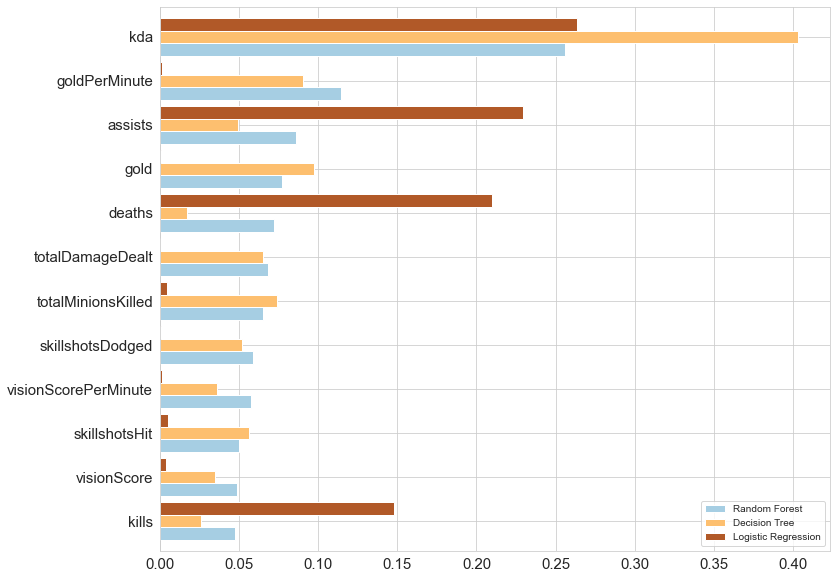

In [33]:
feature_importance=pd.DataFrame({
    'Random Forest':rf_model.feature_importances_,
    'Decision Tree':dt_model.feature_importances_,
    'Logistic Regression':[abs(i) for i in log_model.coef_[0]]
},index=leaguedata.drop(columns=['win']).columns)
feature_importance.sort_values(by='Random Forest',ascending=True,inplace=True)

feature_importance.plot(kind='barh',figsize=(12,10), width=.85, colormap='Paired', fontsize=15)